# Gaussian Noise

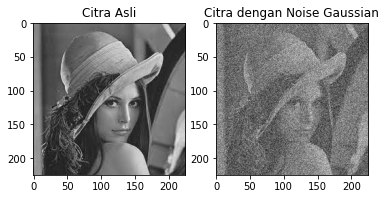

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load gambar asli
image = cv2.imread('bahan/lenna.jpg',  cv2.IMREAD_GRAYSCALE)
image = np.array(image)

# Parameter noise Gaussian
mean = 0
std_dev = 50

# Generate noise
noise = np.random.randn(*image.shape) * std_dev + mean

# Tambahkan noise ke citra
noisy_image = image + noise

# Tampilkan citra asli dan citra yang terkontaminasi noise
plt.subplot(1, 2, 1)
plt.imshow(image,'gray')
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image,'gray')
plt.title('Citra dengan Noise Gaussian')

plt.show()

# Salt and paper

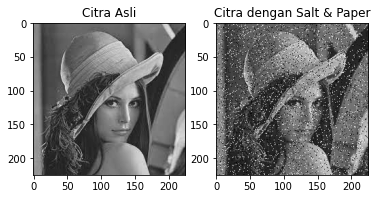

In [3]:

def sp_noise(image, prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = image.copy()
    if len(image.shape) == 2:
        black = 0
        white = 255            
    else:
        colorspace = image.shape[2]
        if colorspace == 3:  # RGB
            black = np.array([0, 0, 0], dtype='uint8')
            white = np.array([255, 255, 255], dtype='uint8')
        else:  # RGBA
            black = np.array([0, 0, 0, 255], dtype='uint8')
            white = np.array([255, 255, 255, 255], dtype='uint8')
    probs = np.random.random(output.shape[:2])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    return output
salt = sp_noise(image, 0.1)
# Tampilkan citra asli dan citra yang terkontaminasi noise
plt.subplot(1, 2, 1)
plt.imshow(image,'gray')
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(salt,'gray')
plt.title('Citra dengan Salt & Paper')

plt.show()

# Restorasi

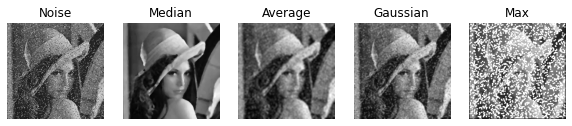

In [5]:
# Median Blur
median_blurred = cv2.medianBlur(salt, 5) # Gunakan kernel ukuran 5x5

# Max Blur

def max_blur(image, kernel_size):
    height, width = image.shape
    blurred_image = np.zeros_like(image)
    for y in range(kernel_size[1] // 2, height - kernel_size[1] // 2):
        for x in range(kernel_size[0] // 2, width - kernel_size[0] // 2):
            window = image[y - kernel_size[1] // 2: y + kernel_size[1] // 2 + 1,
                           x - kernel_size[0] // 2: x + kernel_size[0] // 2 + 1]
            
            blurred_image[y, x] = np.max(window[:, :])
    return blurred_image

# Average Blur
average_blurred = cv2.blur(salt, (5, 5)) # Gunakan kernel ukuran 5x5

gaussian_blurred = cv2.GaussianBlur(salt, (5, 5), 0) # Gunakan kernel ukuran 5x5, sigma=0

plt.figure(figsize=(10, 8))
plt.subplot(1, 5, 1)
plt.imshow(salt,'gray')
plt.title('Noise')
plt.axis('off')
plt.subplot(1, 5, 2)
plt.imshow(median_blurred,'gray')
plt.title('Median')
plt.axis('off')
plt.subplot(1, 5, 3)
plt.imshow(average_blurred,'gray')
plt.title('Average')
plt.axis('off')
plt.subplot(1, 5, 4)
plt.imshow(gaussian_blurred,'gray')
plt.title('Gaussian')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(max_blur(salt,(2,2)),'gray')
plt.title('Max')
plt.axis('off')
plt.show()



In [2]:
import cv2
import numpy as np

# Buat citra contoh 3x3
image = np.array([[14, 15, 16],
                  [24, 25, 26],
                  [34, 35, 36]], dtype=np.uint8)

# Lakukan blur Gaussian dengan OpenCV
blurred_image = cv2.GaussianBlur(image, (3, 3), 1.5)

# Tampilkan citra asli dan citra yang telah di-blur
print("Citra Asli:")
print(image)
print("\nCitra Blur:")
print(blurred_image)

Citra Asli:
[[14 15 16]
 [24 25 26]
 [34 35 36]]

Citra Blur:
[[21 21 22]
 [25 25 25]
 [28 29 29]]


In [5]:
import cv2
import numpy as np


# Buat kernel Gaussian 3x3 dengan sigma = 1.5
kernel = cv2.getGaussianKernel(ksize=3, sigma=1.5)



kernel = kernel * kernel.transpose()
print(kernel)
# Lakukan blur Gaussian dengan kernel yang telah dibuat
blurred_image = cv2.filter2D(image, -1, kernel)

# Tampilkan citra asli dan citra yang telah di-blur
print("Citra Asli:")
print(image)
print("\nCitra Blur:")
print(blurred_image)

[[0.09474166 0.11831801 0.09474166]
 [0.11831801 0.14776132 0.11831801]
 [0.09474166 0.11831801 0.09474166]]
Citra Asli:
[[14 15 16]
 [24 25 26]
 [34 35 36]]

Citra Blur:
[[21 21 22]
 [25 25 25]
 [28 29 29]]


In [8]:
!pip list

Package                           Version
--------------------------------- -------------------
absl-py                           0.15.0
aiofiles                          23.2.1
aiohttp                           3.8.1
aiosignal                         1.2.0
altair                            5.3.0
anyio                             3.6.2
appdirs                           1.4.4
appnope                           0.1.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.2
asttokens                         2.0.7
astunparse                        1.6.3
async-timeout                     4.0.2
attrs                             23.2.0
audioread                         3.0.0
aws-lambda-builders               1.10.0
aws-sam-translator                1.42.0
backcall                          0.2.0
backports.entry-points-selectable 1.1.0
beautifulsoup4                    4.11.1
binaryornot                       0.4.4
bleach          

scikit-build                      0.16.4
scikit-fuzzy                      0.4.2
scikit-image                      0.19.3
scikit-learn                      1.2.2
scipy                             1.10.1
seaborn                           0.13.2
segment-anything-fast             0.1.2
semantic-version                  2.10.0
Send2Trash                        1.8.3
sentencepiece                     0.1.97
serverlessrepo                    0.1.10
setuptools                        70.3.0
shapely                           2.0.0
simplegeneric                     0.8.1
six                               1.12.0
skl2onnx                          1.17.0
sklearn-genetic-opt               0.9.0
sniffio                           1.3.0
sortedcontainers                  2.4.0
sounddevice                       0.4.5
soundfile                         0.11.0
soupsieve                         2.3.2.post1
spafe                             0.3.1
SpeechRecognition                 3.9.0
stack-data             